In [1]:
import lucem_illud
import networkx as nx

import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn
import scipy 
import nltk
from IPython.display import Image

import pickle
import os

In [2]:
tweets = pd.read_csv('cleaned_tweets.csv', index_col=0)

In [3]:
tw_small = tweets[tweets.foreign_frac < 0.3]

Intovert vs. Extravert

In [4]:
introvert = tw_small[tw_small.extravert == 0]

In [5]:
extravert = tw_small[tw_small.extravert == 1]

Prospecting vs. Judging

In [6]:
prospecting = tw_small[tw_small.judging == 0]

In [7]:
judging = tw_small[tw_small.judging == 1]

Intuiitive vs. Observant

In [8]:
intuitive = tw_small[tw_small.intuitive == 1]

In [9]:
observant = tw_small[tw_small.intuitive == 0]

Analyst vs. Diplomat vs. Sentinel vs. Explorer

In [10]:
analyst = tw_small[(tw_small.type == 'INTJ') | (tw_small.type == 'INTP') | (tw_small.type == 'ENTJ') | (tw_small.type == 'ENTP')]

In [11]:
diplomat = tw_small[(tw_small.type == 'INFJ') | (tw_small.type == 'INFP') | (tw_small.type == 'ENFJ') | (tw_small.type == 'ENFP')]

In [12]:
sentinel = tw_small[(tw_small.type == 'ISTJ') | (tw_small.type == 'ISFJ') | (tw_small.type == 'ESTJ') | (tw_small.type == 'ESFJ')]

In [13]:
explorer = tw_small[(tw_small.type == 'ISTP') | (tw_small.type == 'ISFP') | (tw_small.type == 'ESTP') | (tw_small.type == 'ESFP')]

# Characterizing the Structure of Words and Documents

In [14]:
#remove this chunk when working with full data
introvert = introvert.sample(n=25)
extravert = extravert.sample(n=25)
prospecting = prospecting.sample(n=25)
judging = judging.sample(n=25)
intuitive = intuitive.sample(n=25)
observant = observant.sample(n=25)
analyst = analyst.sample(n=25)
diplomat = diplomat.sample(n=25)
sentinel = sentinel.sample(n=25)
explorer = explorer.sample(n=25)

In [ ]:
analyst = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/analyst.json')
diplomat = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/diplomat.json')
explorer = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/explorer.json')
extravert = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/extravert.json')
introvert = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/introvert.json')
intuitive = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/intuitive.json')
judging = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/judging.json')
observant = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/observant.json')
prospecting = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/prospecting.json')
sentinel = pd.read_json('/Users/egemenpamukcu/Downloads/Homework-Notebooks-master/week-5/data/sentinel.json')

In [15]:
dfs = [introvert, extravert, prospecting, judging, intuitive, observant, analyst, diplomat, sentinel, explorer]

In [30]:
for df in dfs:
    df['tokenized_sents'] = df['clean_text'].apply(lambda x: [lucem_illud.word_tokenize(s) for s in lucem_illud.sent_tokenize(x)])
    df['normalized_sents'] = df['tokenized_sents'].apply(lambda x: [lucem_illud.normalizeTokens(s) for s in x])

In [16]:
def wordCooccurrence(sentences, makeMatrix = False):
    words = set()
    for sent in sentences:
        words |= set(sent)
    wordLst = list(words)
    wordIndices = {w: i for i, w in enumerate(wordLst)}
    wordCoCounts = {}
    #consider a sparse matrix if memory becomes an issue
    coOcMat = np.zeros((len(wordIndices), len(wordIndices)))
    for sent in sentences:
        for i, word1 in enumerate(sent):
            word1Index = wordIndices[word1]
            for word2 in sent[i + 1:]:
                coOcMat[word1Index][wordIndices[word2]] += 1
    if makeMatrix:
        return coOcMat, wordLst
    else:
        coOcMat = coOcMat.T + coOcMat
        g = nx.convert_matrix.from_numpy_matrix(coOcMat)
        g = nx.relabel_nodes(g, {i : w for i, w in enumerate(wordLst)})
        return g

In [17]:
def contractNetwork(g, targetType):
    g_mono = nx.Graph()
    g_mono.add_nodes_from(((n, d) for n, d in g_2mode.nodes(data = True) if d['bipartite'] == targetType))
    
    for n_outside in (n for n, d in g_2mode.nodes(data = True) if d['bipartite'] != targetType):
        neighbors = list((n for n in g.neighbors(n_outside) if g.nodes[n]['bipartite'] == targetType))
        for i, n1 in enumerate(neighbors):
            for n2 in neighbors[i+1:]:
                try:
                    g_mono.edges[n1, n2]['weight'] += 1
                except KeyError:
                    g_mono.add_edge(n1, n2, weight = 1)
    return g_mono

In [18]:
def tokenize(text):
    tokenlist = lucem_illud.word_tokenize(text)
    normalized = lucem_illud.normalizeTokens(tokenlist)
    return normalized

In [74]:
word_cooccurrences = []
for df in dfs:
    word_cooccurrences.append(wordCooccurrence(df['normalized_sents'].sum()))

In [19]:
df_labels = ['introvert', 'extravert', 'prospecting', 'judging', 'intuitive', 'observant', 'analyst', 'diplomat', 'sentinel', 'explorer']

In [75]:
categories = {df_labels[i]: [dfs[i], word_cooccurrences[i]] for i in range(len(dfs))}

In [76]:
pd.DataFrame({df_labels[i]: [len(word_cooccurrences[i].nodes), 
                            len(word_cooccurrences[i].edges)] for i in range(len(dfs))},
            index=['nodes', 'edges'])

introvert  extravert  prospecting  judging  intuitive  observant  \
nodes      14922      13795        13617    15096      14052      13573   
edges     265078     247625       225040   280165     226026     244874   

       analyst  diplomat  sentinel  explorer  
nodes    15006     13752     14317     14146  
edges   258402    226765    233168    227891

# Introverts (red) vs. Extraverts (blue)

In [20]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([extravert, introvert])['clean_text'])

In [21]:
g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

In [22]:
gDoc = contractNetwork(g_2mode, 'doc')

In [23]:
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

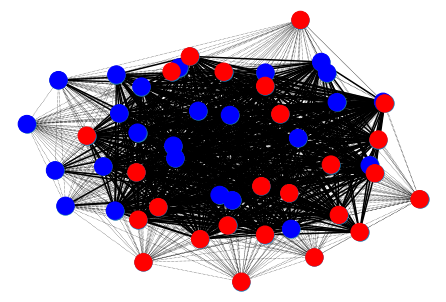

In [24]:
wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1.5, node_color = ['blue']*extravert.shape[0] + ['red']*introvert.shape[0])

# Prospecting (blue) vs. Judging (red)

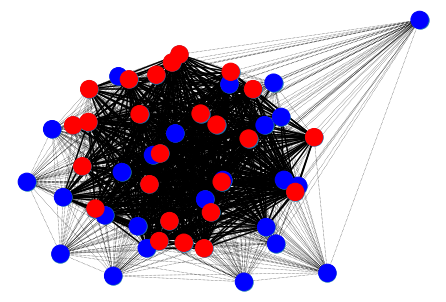

In [25]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([prospecting, judging])['clean_text'])

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

gDoc = contractNetwork(g_2mode, 'doc')
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1.5, node_color = ['blue']*prospecting.shape[0] + ['red']*judging.shape[0])

# Intuitive (blue) vs. Obersvant (red)

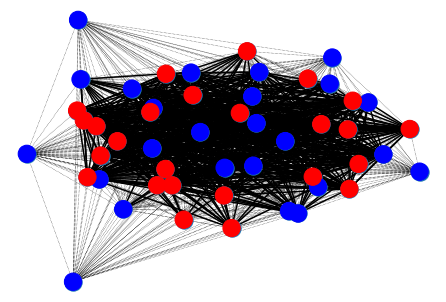

In [26]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([intuitive, judging])['clean_text'])

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

gDoc = contractNetwork(g_2mode, 'doc')
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout, edgelist = edgesLow, style='dotted', width=.5)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1.5, node_color = ['blue']*intuitive.shape[0] + ['red']*observant.shape[0])

# Analyst (blue), Diplomat (red), Sentinel (green), Explorer (grey)

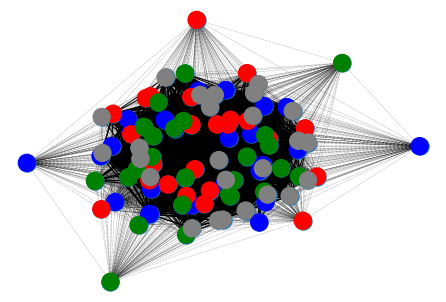

In [27]:
twVectorizer = sklearn.feature_extraction.text.CountVectorizer(tokenizer = tokenize)
twVects_incidence = twVectorizer.fit_transform(pd.concat([analyst, diplomat, sentinel, explorer])['clean_text'])

g_2mode = nx.Graph()

#define all the nodes
g_2mode.add_nodes_from((twVectorizer.get_feature_names()[i] for i in range(twVects_incidence.shape[1])), bipartite = 'word')
g_2mode.add_nodes_from(range(twVects_incidence.shape[0]), bipartite = 'doc')

#add all the edges
g_2mode.add_edges_from(((d, twVectorizer.get_feature_names()[w], {'weight' : twVects_incidence[d, w]}) for d, w in zip(*twVects_incidence.nonzero())))

gDoc = contractNetwork(g_2mode, 'doc')
layout = nx.spring_layout(gDoc, k = 1/3, weight='weight', iterations= 50)

wMedian = np.median([d['weight'] for n1, n2, d in gDoc.edges(data = True)])
edgesHigh = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] > wMedian]
edgesLow = [(n1, n2) for n1, n2, d in gDoc.edges(data = True) if d['weight'] <= wMedian]
nx.draw(gDoc, pos = layout,edgelist = edgesLow, style='dotted', width=.3,
       alpha=1)
nx.draw(gDoc, pos = layout, nodelist=None, edgelist = edgesHigh, width=1, 
        node_color = ['blue']*analyst.shape[0] + ['red']*diplomat.shape[0] + ['green']*sentinel.shape[0] + ['grey']*explorer.shape[0],
       alpha=1)

# Sentence Cooccurrences, Roles

In [28]:
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)

## Analyst

In [38]:
g = wordCooccurrence(analyst['normalized_sents'].sum())

In [43]:
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first

In [45]:
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 125
Average degree:   3.7313


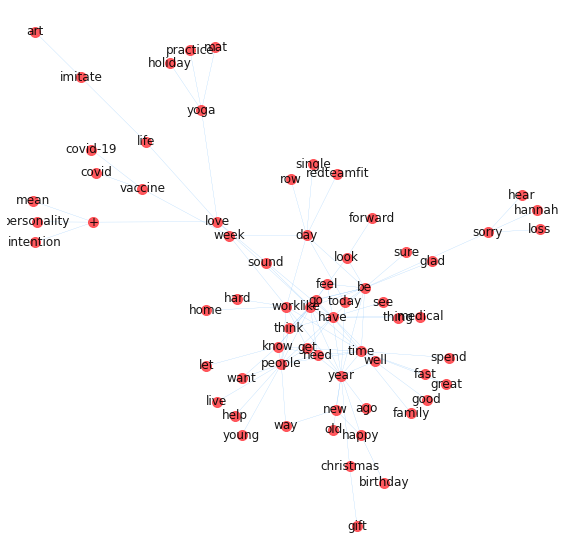

In [46]:
layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

## Diplomat

Name: 
Type: Graph
Number of nodes: 54
Number of edges: 158
Average degree:   5.8519


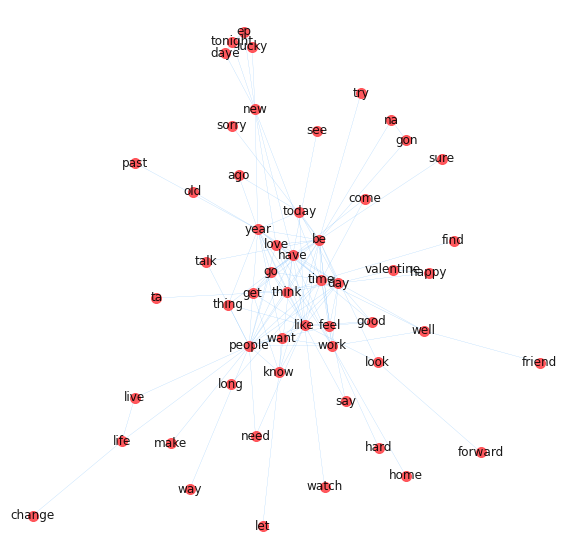

In [47]:
g = wordCooccurrence(diplomat['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

## Sentinel

Name: 
Type: Graph
Number of nodes: 46
Number of edges: 120
Average degree:   5.2174


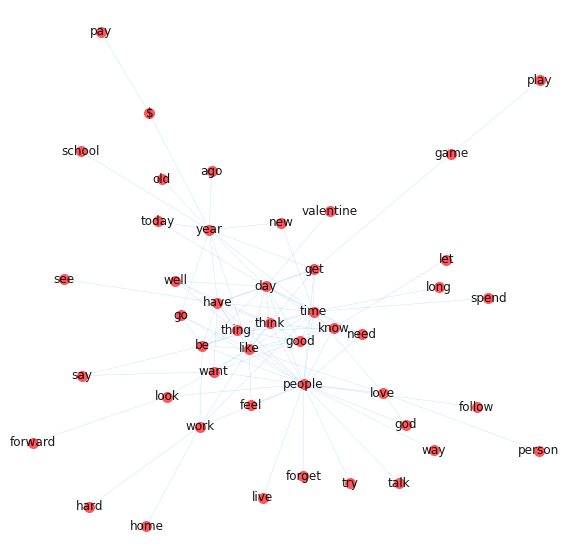

In [48]:
g = wordCooccurrence(sentinel['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

## Explorer

Name: 
Type: Graph
Number of nodes: 60
Number of edges: 144
Average degree:   4.8000


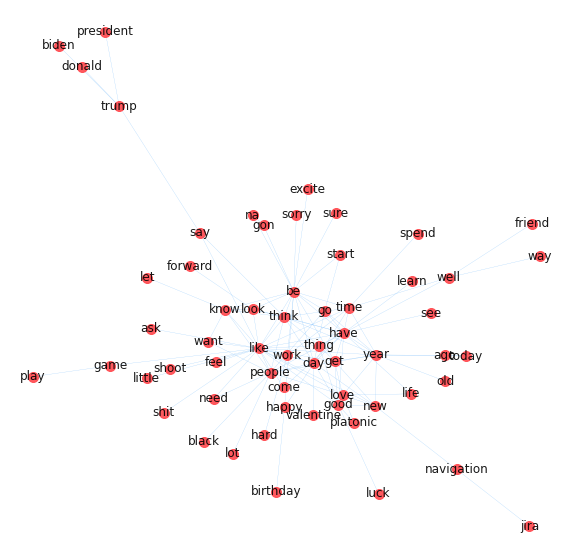

In [49]:
g = wordCooccurrence(explorer['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

# Sentence Cooccurrences, Introvert vs. Extravert

## Introvert

Name: 
Type: Graph
Number of nodes: 75
Number of edges: 186
Average degree:   4.9600


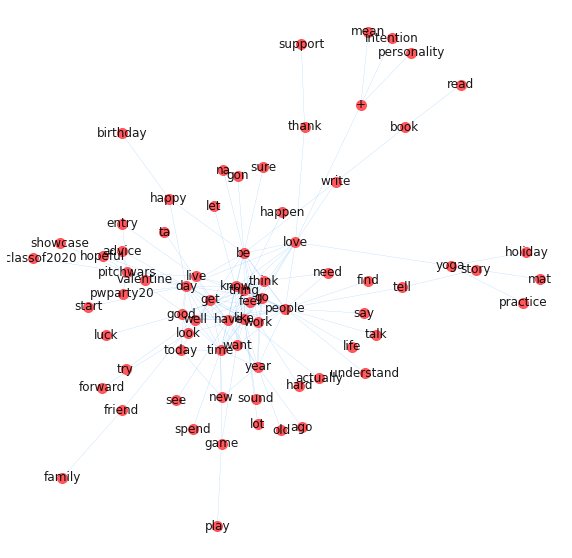

In [58]:
g = wordCooccurrence(introvert['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [59]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

day, like, know, have, get, well, time


## Extravert

Name: 
Type: Graph
Number of nodes: 80
Number of edges: 213
Average degree:   5.3250


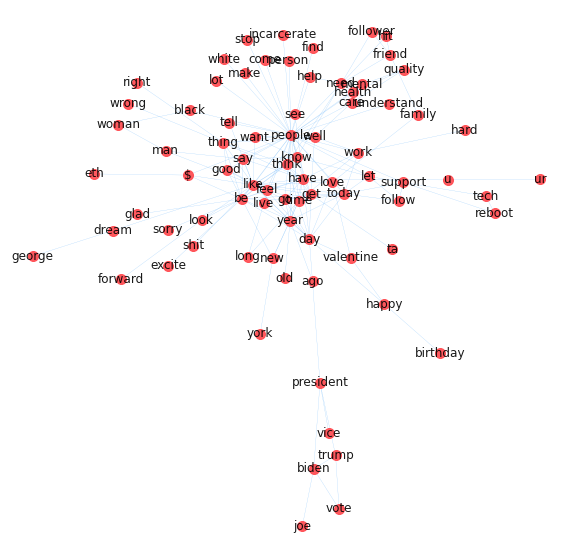

In [60]:
g = wordCooccurrence(extravert['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [61]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

day, like, have, be, think, get


# Sentence Cooccurrences, Prospecting vs. Judging

## Prospecting

Name: 
Type: Graph
Number of nodes: 67
Number of edges: 153
Average degree:   4.5672


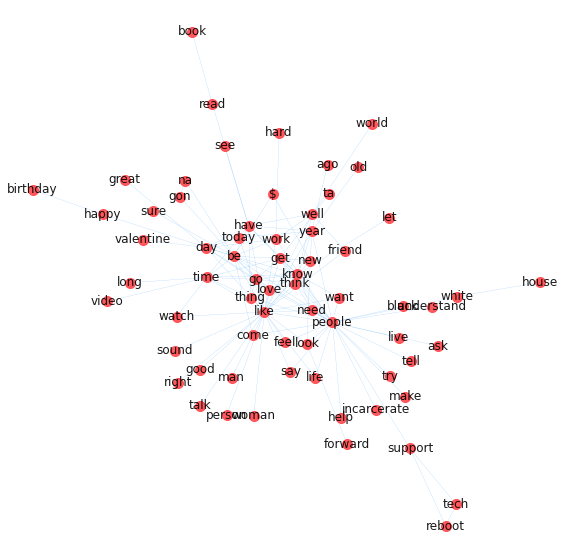

In [65]:
g = wordCooccurrence(prospecting['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [66]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

like, time, go, know, be, get


## Judging

Name: 
Type: Graph
Number of nodes: 98
Number of edges: 206
Average degree:   4.2041


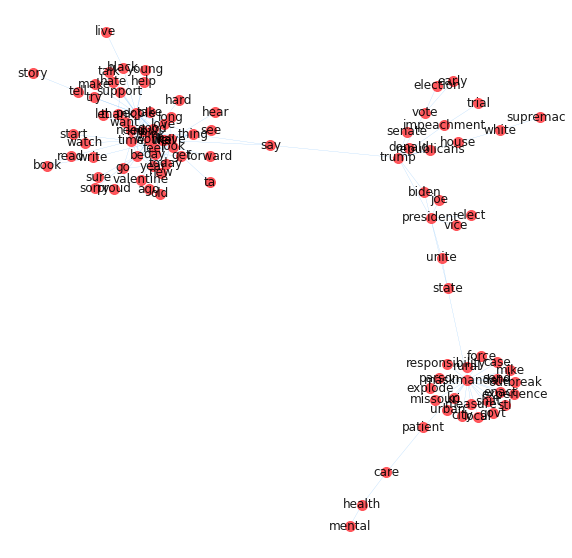

In [67]:
g = wordCooccurrence(judging['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [68]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

today, year, day, have, be, like


# Sentence Cooccurrences, Intuitive vs. Observant

## Intuitive

Name: 
Type: Graph
Number of nodes: 55
Number of edges: 148
Average degree:   5.3818


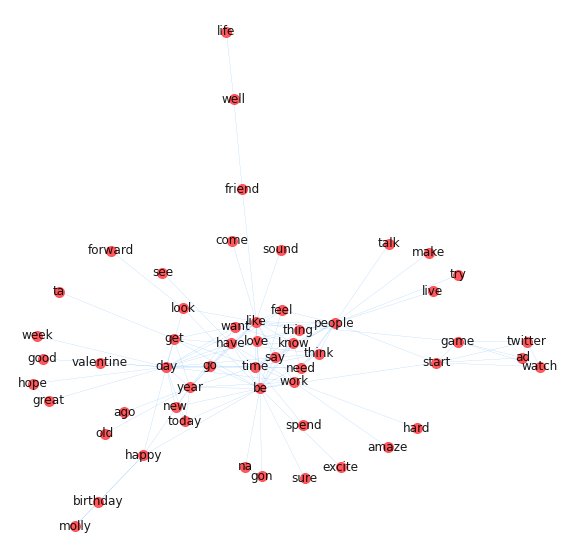

In [69]:
g = wordCooccurrence(intuitive['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.2, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [70]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

day, like, year, time, have, work


## Observant

Name: 
Type: Graph
Number of nodes: 47
Number of edges: 108
Average degree:   4.5957


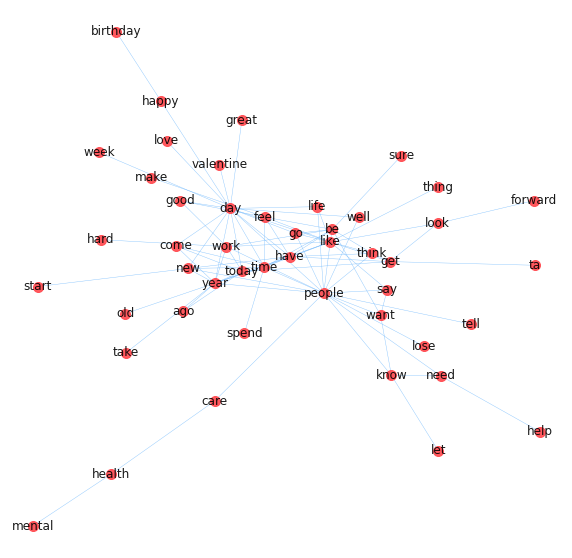

In [71]:
g = wordCooccurrence(observant['normalized_sents'].sum())
g.remove_edges_from([(n1, n2) for n1, n2, d in g.edges(data = True) if d['weight'] <= 15])
g.remove_nodes_from(list(nx.isolates(g))) #since we are changing the graph list() evaluates the isolates first
giant = max(connected_component_subgraphs(g), key=len) # keep just the giant connected component
print(nx.info(giant))

layout = nx.spring_layout(giant, weight='weight', iterations= 100)
fig, ax = plt.subplots(figsize = (10,10))
nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
        width=.4, 
        alpha = .9, 
        node_size = 100,
        node_color = "xkcd:light red",
        edge_color='xkcd:sky blue') #Getting labels is a bit annoying

In [72]:
print(', '.join(max(nx.clique.find_cliques(giant), key = lambda x: len(x))))

feel, like, be, have, time


# Centralities

In [78]:
categories['analyst'][1]

In [81]:
for k, v in categories.items():  
    v[1].remove_edges_from([(n1, n2) for n1, n2, d in v[1].edges(data = True) if d['weight'] <= 15])
    v[1].remove_nodes_from(list(nx.isolates(v[1]))) 
    giant = max(connected_component_subgraphs(v[1]), key=len)
    v.append(giant)

## Words most central to each group

### Degree centrality

In [82]:
dcentralities = {k: nx.degree_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [83]:
pd.DataFrame(most_central)

introvert extravert prospecting      judging intuitive observant analyst  \
0    people    people        like       people        be       day    have   
1      like      like      people  maskmandate      like    people      be   
2       day        be          be         like       day      like    year   
3        be      have        know         time    people      year    time   
4      time       day        have         have      time      time  people   
5      know      year         get          day      year        be    like   
6      have       get        time           be      have      have    work   
7     thing      need          go         year      know      work     day   
8      love     think         day         work       get       new    know   
9      well     today       think        trump      work     today    love   

  diplomat sentinel explorer  
0       be   people     like  
1     like     like       be  
2   people     time     have  
3     time      day      day  
4      day     year     year  
5     year     have   people  
6     have       be    think  
7     work    think     good  
8      get     know     time  
9    think    thing      get

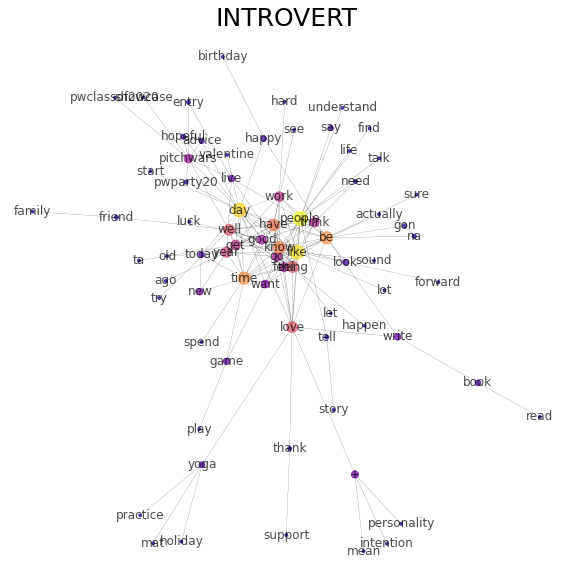

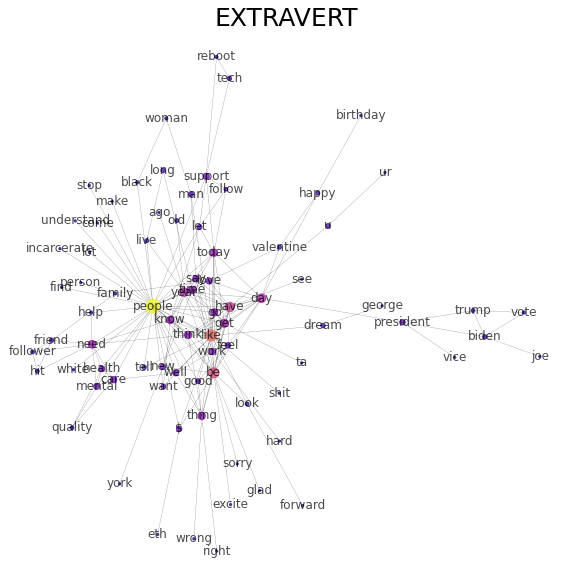

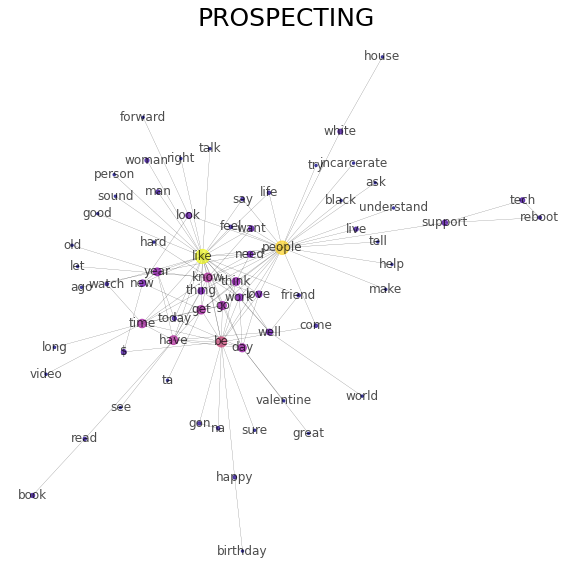

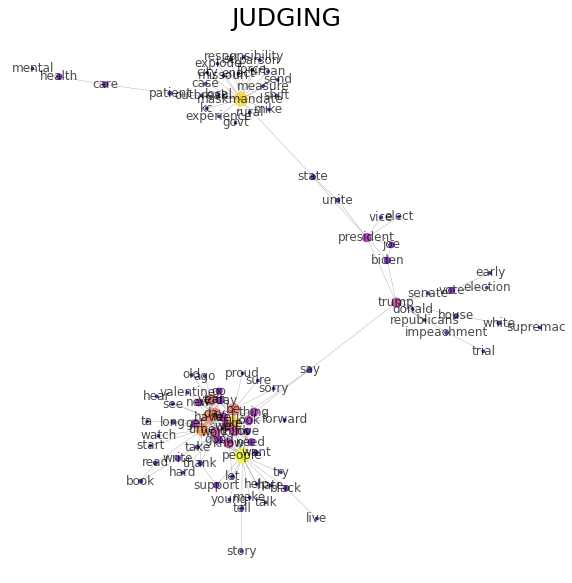

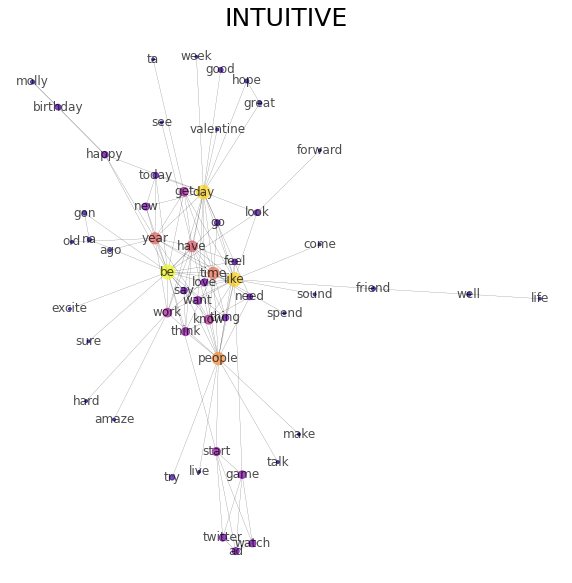

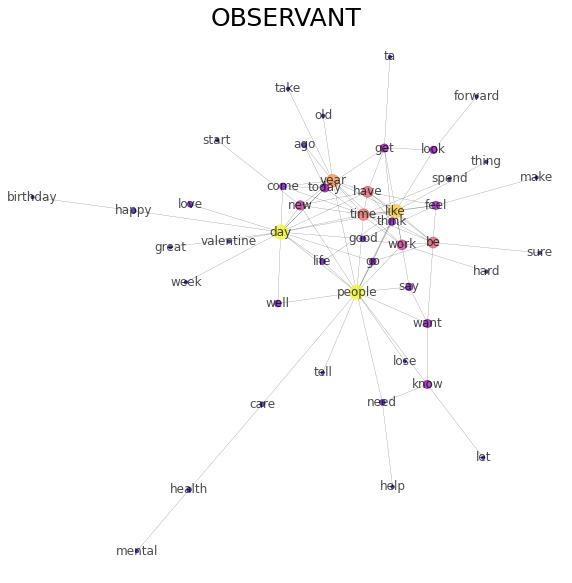

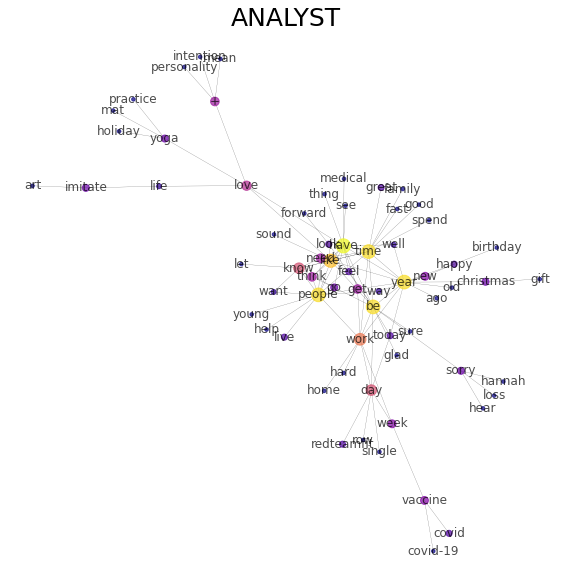

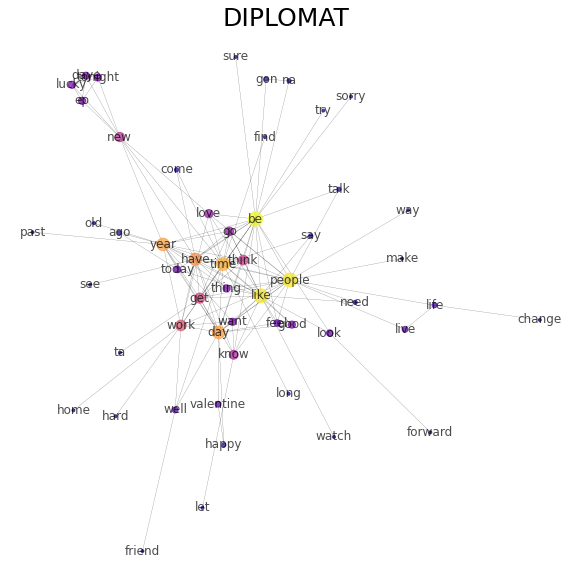

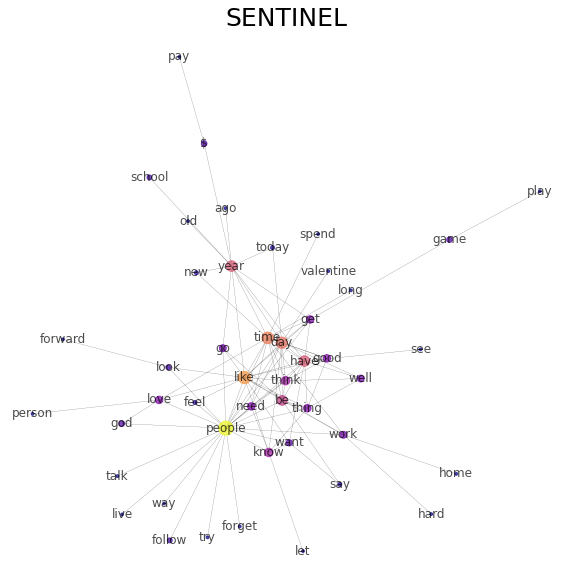

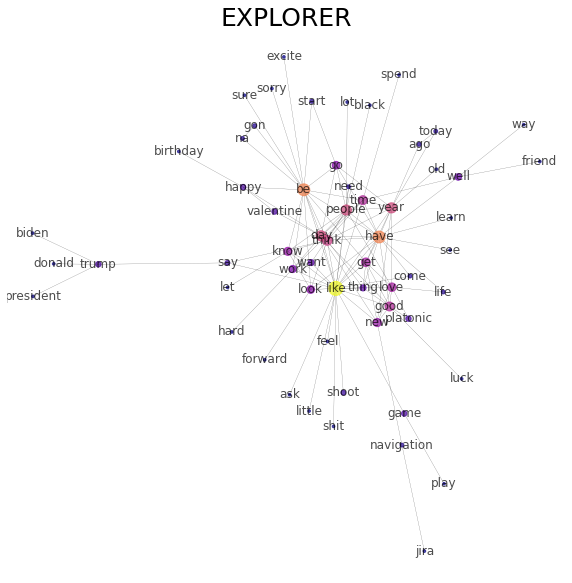

In [84]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper(), size=25)
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

### Betweenness centrality

In [85]:
dcentralities = {k: nx.betweenness.betweenness_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [86]:
pd.DataFrame(most_central)

introvert  extravert prospecting      judging intuitive observant analyst  \
0       love     people      people        trump      like    people    love   
1     people        day        like          say        be       day      be   
2        day       like          be    president       day      like    have   
3         be         be        have         like    people      year    year   
4       like  president        year  maskmandate      year      care    like   
5       well       have         day        state      work      time    time   
6       time       year        time       people     happy      work    work   
7       yoga       need     support        thing      time        be  people   
8          +    support        know         time    friend       get     day   
9  pitchwars      thing         get           be     start      feel    yoga   

  diplomat sentinel explorer  
0       be   people     like  
1   people     year       be  
2     time     time     have  
3     year     like      say  
4      new      day     year  
5     like      get    trump  
6      day     work      day  
7     have     have   people  
8     work     love     time  
9      get     know      new

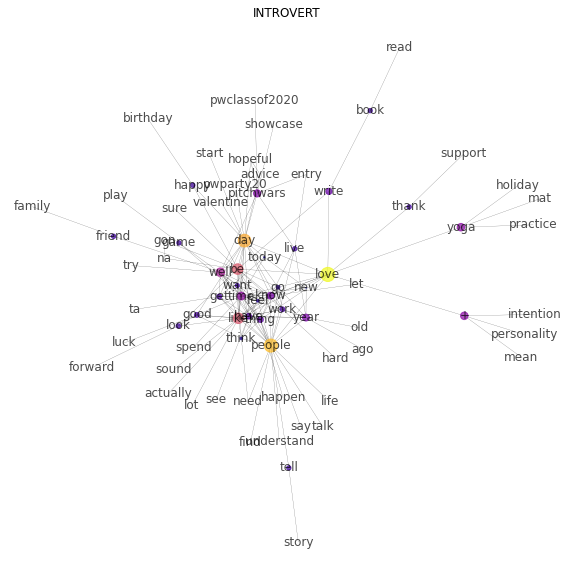

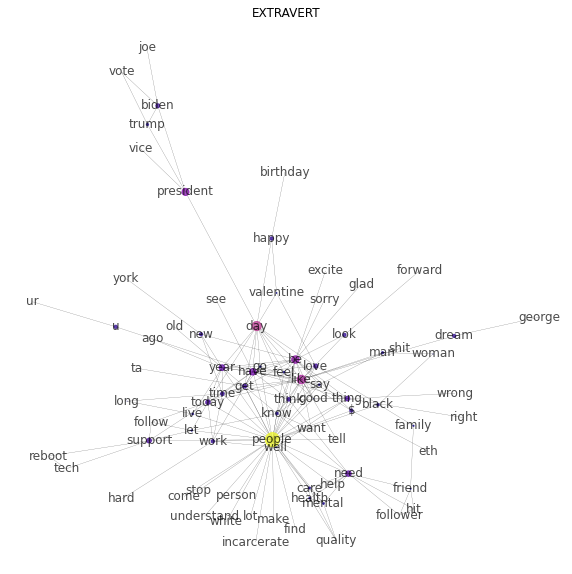

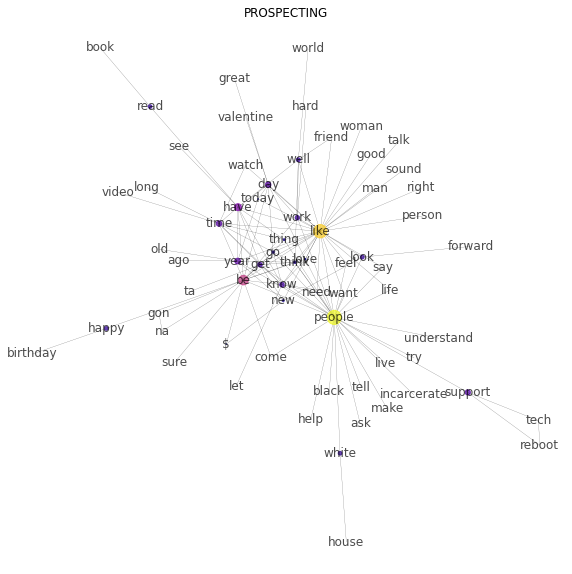

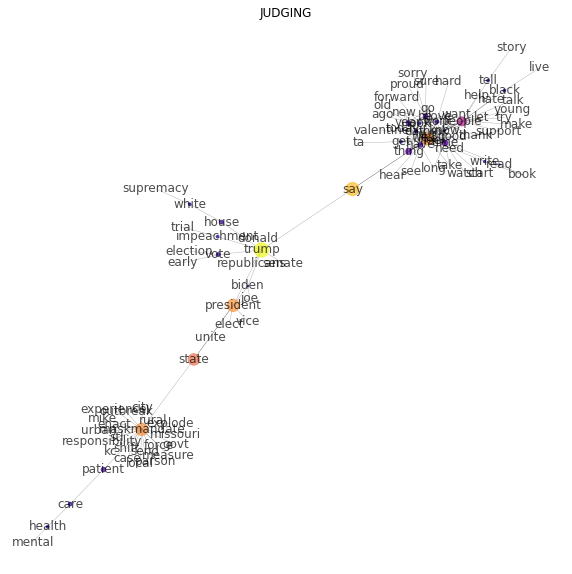

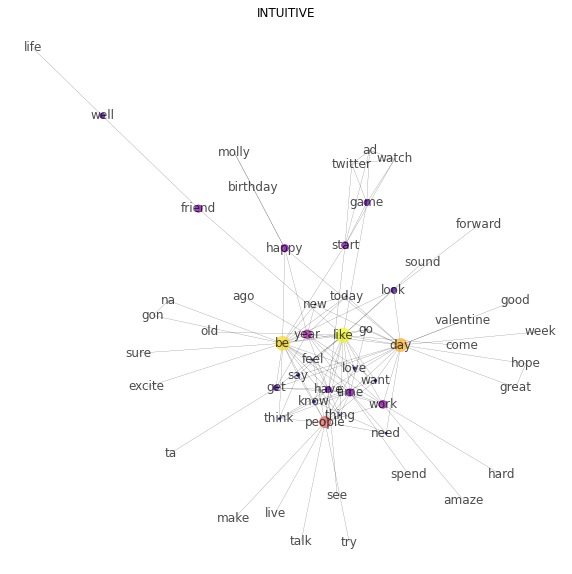

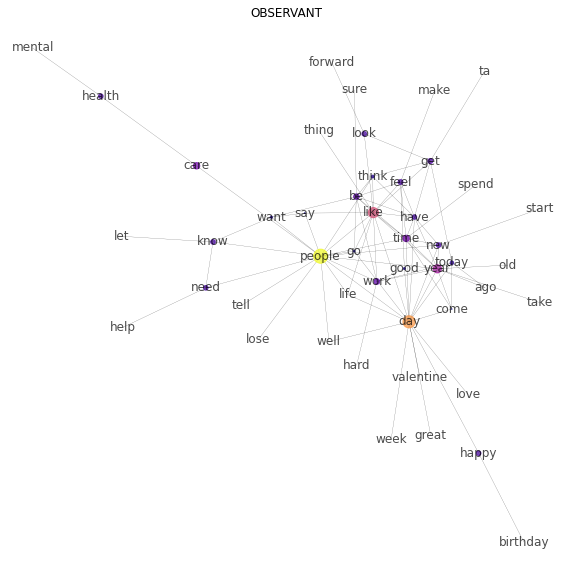

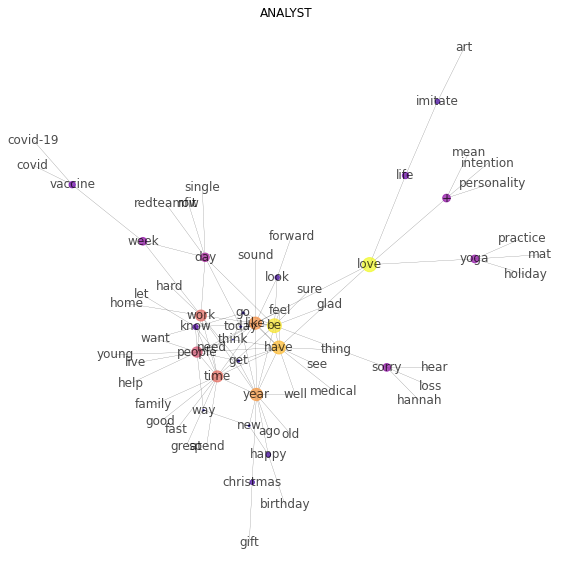

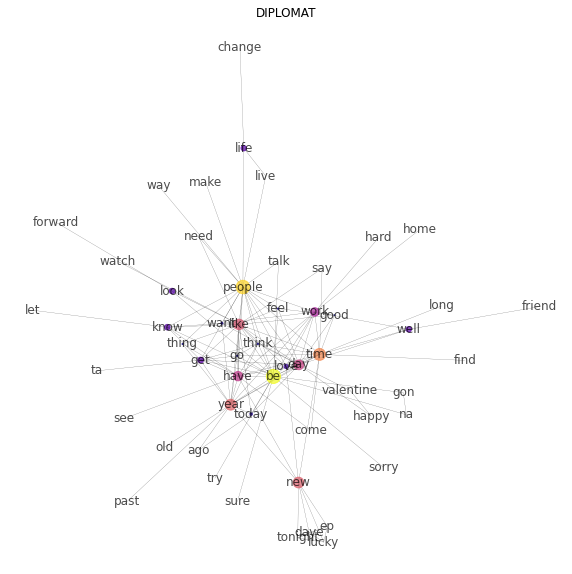

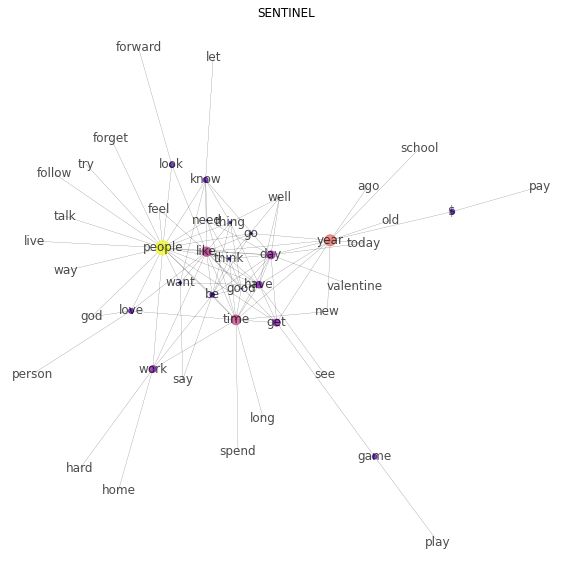

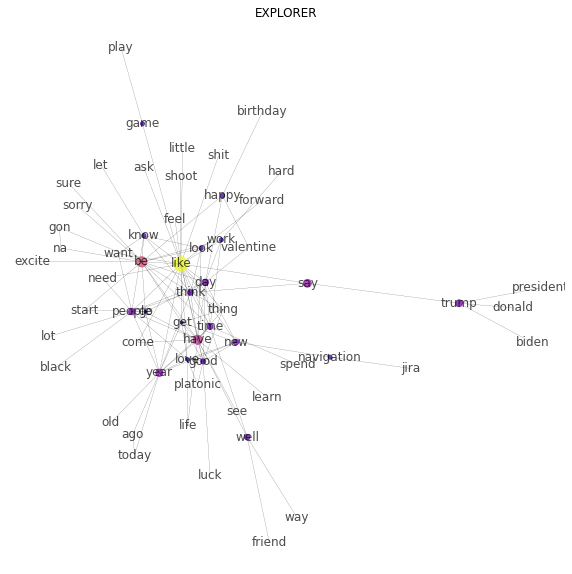

In [87]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper())
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

### Closeness centrality

In [88]:
dcentralities = {k: nx.closeness_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [89]:
pd.DataFrame(most_central)

introvert extravert prospecting    judging intuitive observant analyst  \
0      like    people        like       like      like    people    like   
1    people      like      people        say        be      like    have   
2       day        be          be      trump       day       day      be   
3      know      have        know      thing      time      year    time   
4        be      year         get     people      year      time    year   
5      love     think          go       time      have       new  people   
6      have       get       think       have      work      have    work   
7        go     today        have  president       get      work     get   
8     thing        go        work         be    people        go    love   
9      well       day        year       work      know      life      go   

  diplomat sentinel explorer  
0       be   people     like  
1     time     like     have  
2     like     time    think  
3     have      day       be  
4   people     have      day  
5      day      get     time  
6     year       be      get  
7     work     year   people  
8    think    think     year  
9      get       go     look

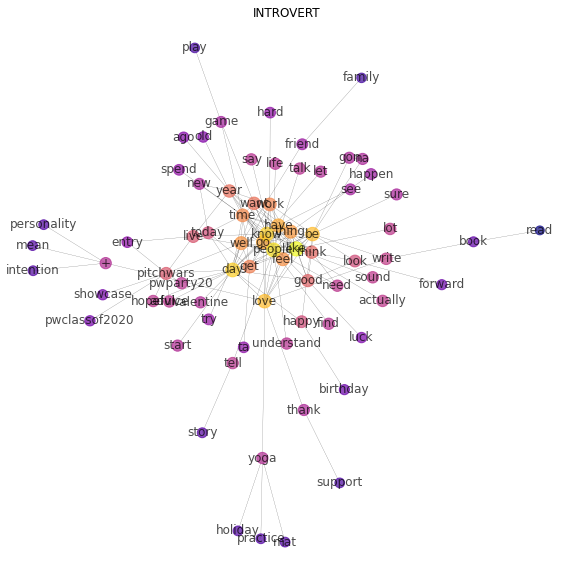

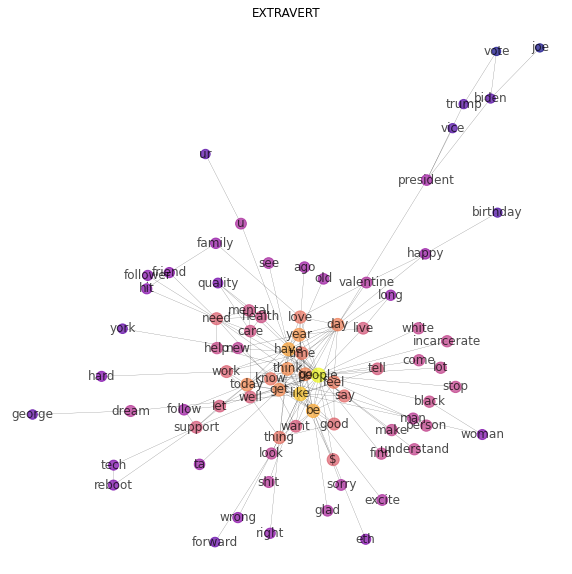

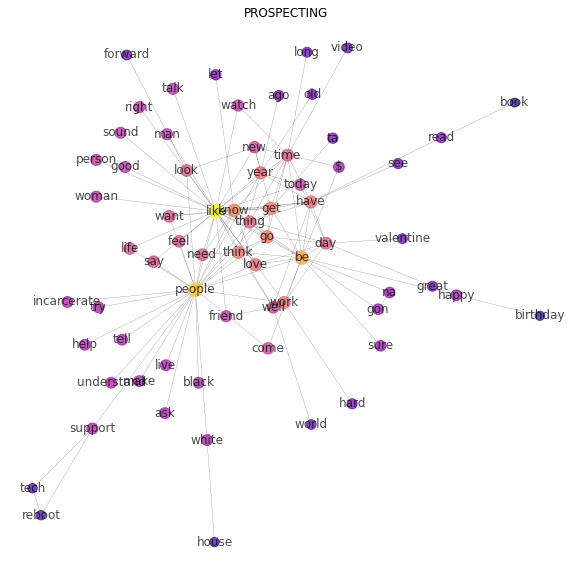

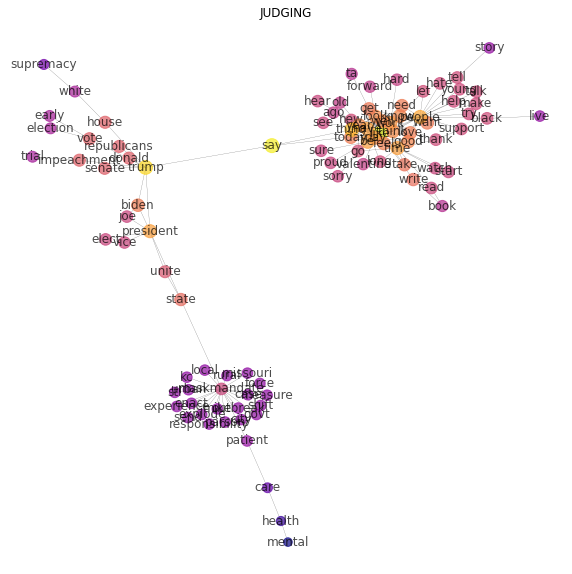

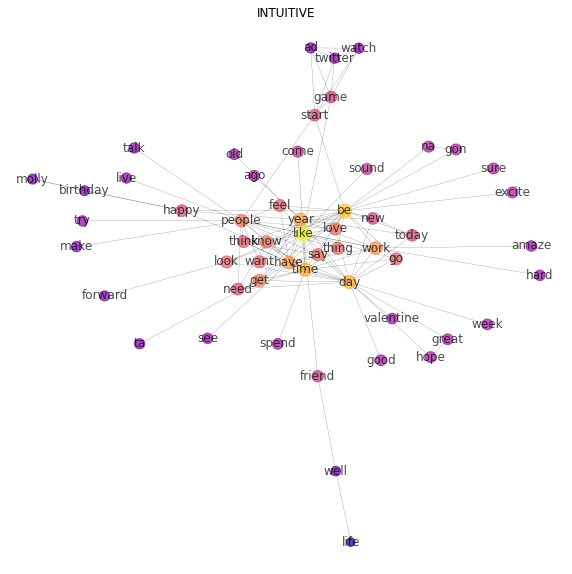

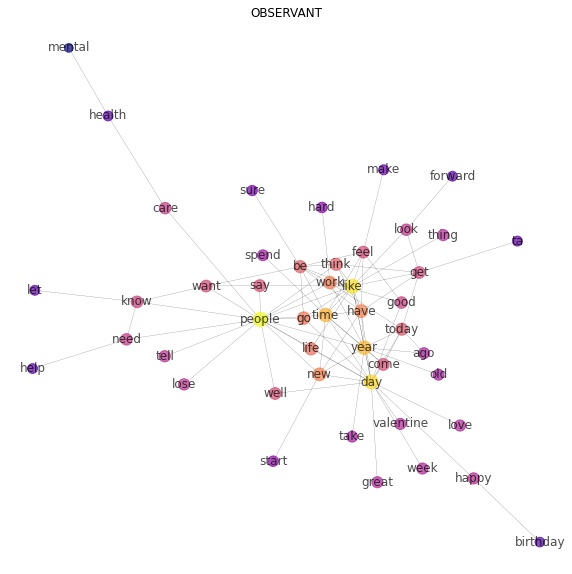

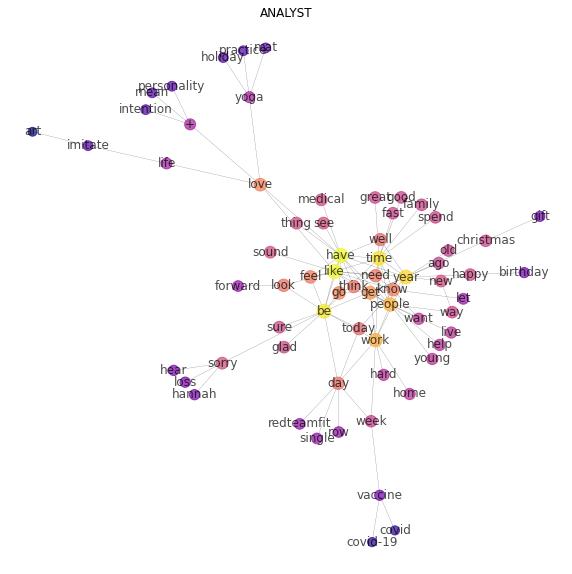

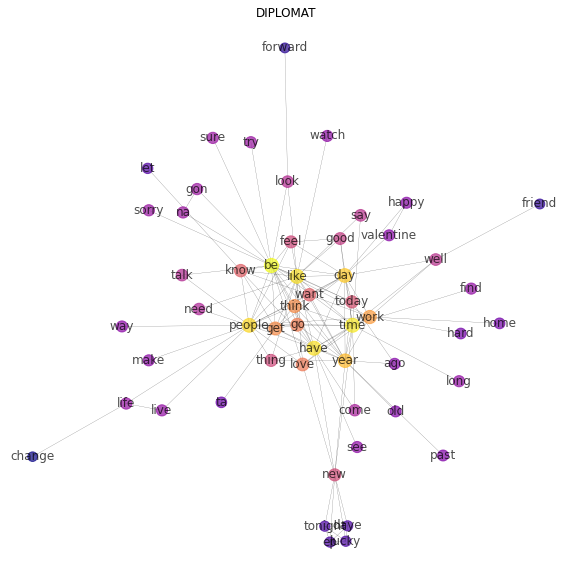

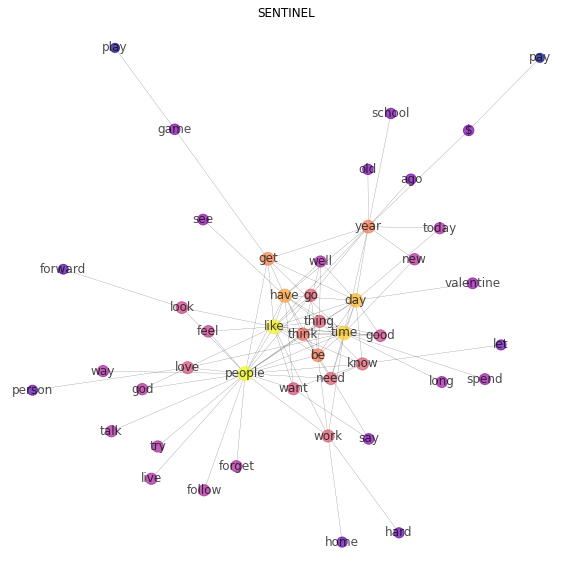

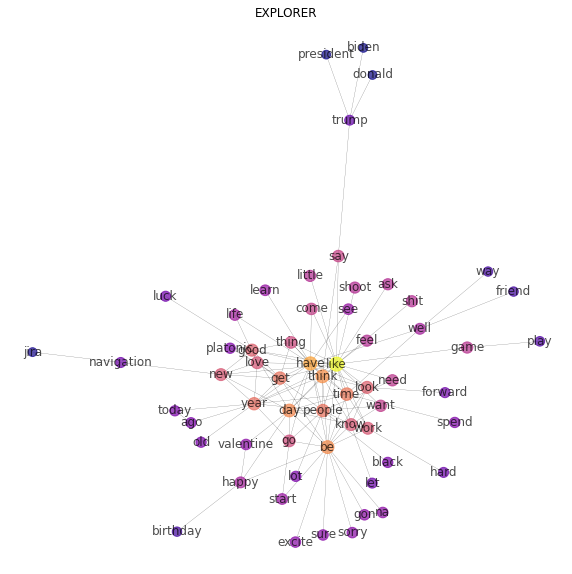

In [90]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper())
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

### Eigenvector centrality

In [91]:
dcentralities = {k: nx.eigenvector_centrality(v[2]) for k, v in categories.items()}
most_central = {}
for k, v in dcentralities.items():
    s = list(map(lambda x: x[0], sorted(v.items(), reverse = True, key = lambda x: x[1])))[:10]
    most_central[k] = s

In [92]:
pd.DataFrame(most_central)

introvert extravert prospecting judging intuitive observant analyst  \
0      like    people        like    like      like      like    have   
1    people      like      people    have        be       day    like   
2      know        be          be  people      time    people    time   
3      have      have        know     day       day      year      be   
4       day      year         get    time      have      time  people   
5      time       get          go      be      year      have    year   
6        be       day        have    year    people        be    work   
7     thing     think       think    work      know       new    know   
8      well        go        time   think      work      work    need   
9      love     today         day    well       get     think     get   

  diplomat sentinel explorer  
0     like   people     like  
1       be     like     have  
2   people     time       be  
3     have      day    think  
4      day     have      day  
5     time       be     year  
6     year    think   people  
7    think     year     time  
8      get      get      get  
9     work    thing     good

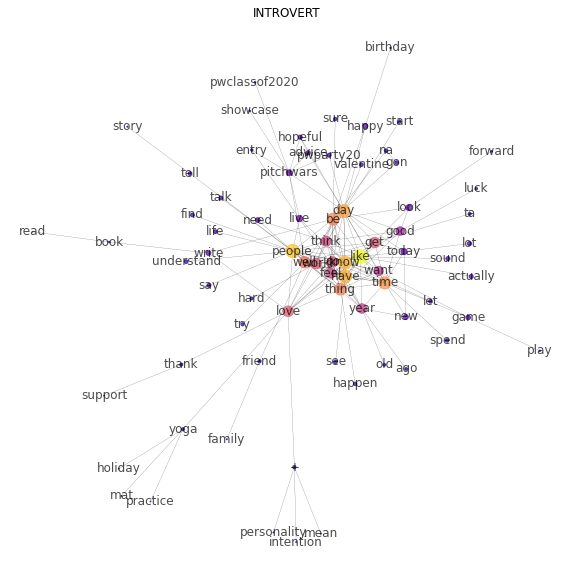

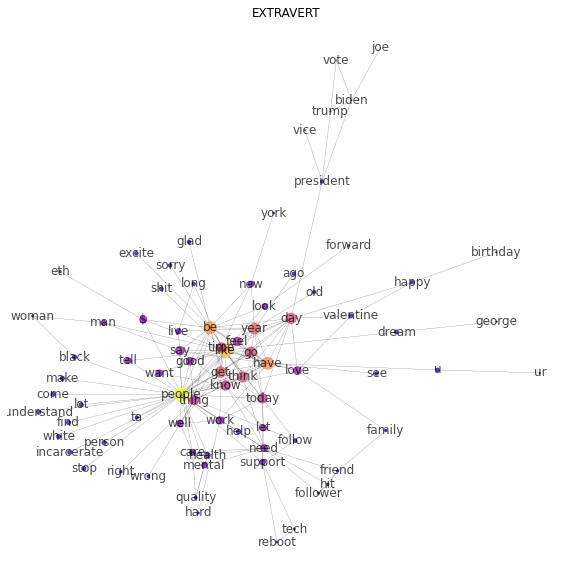

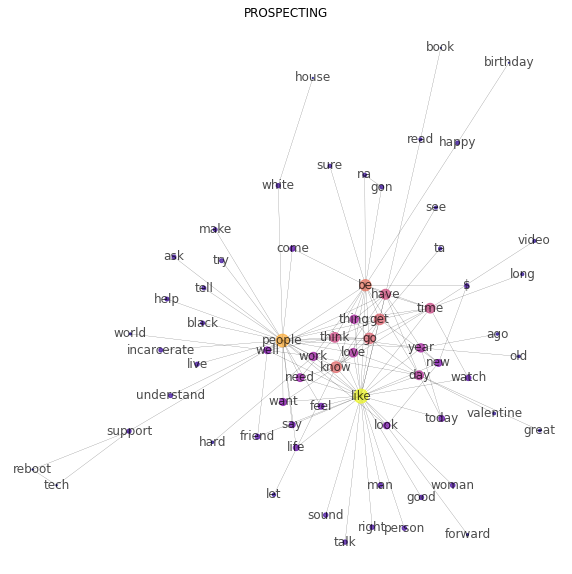

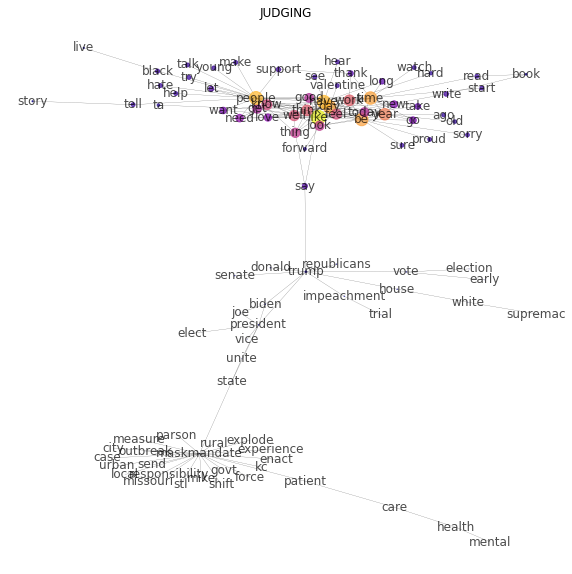

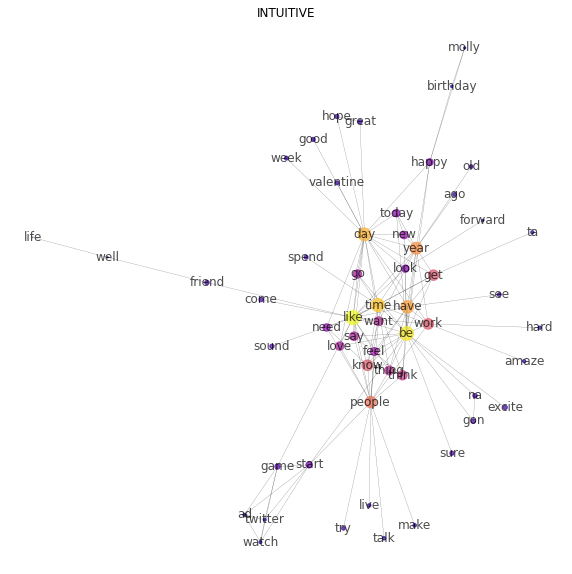

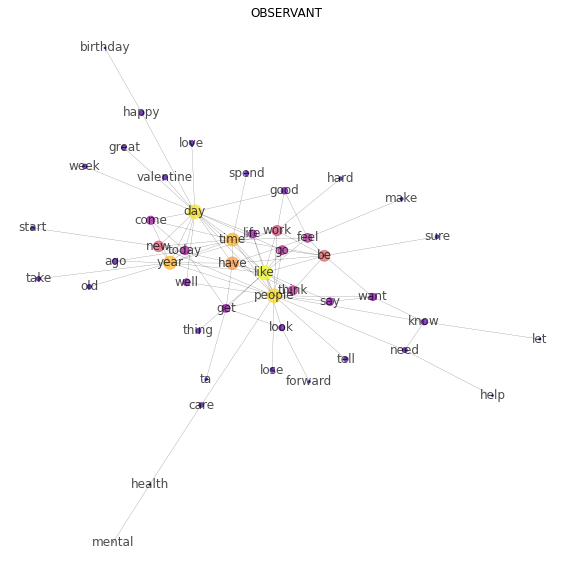

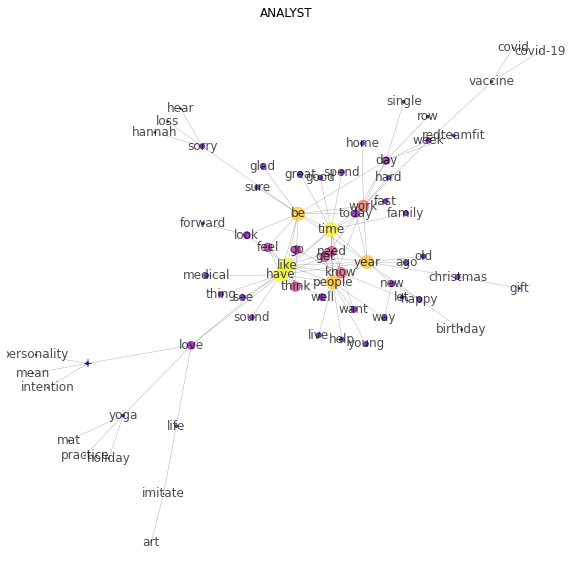

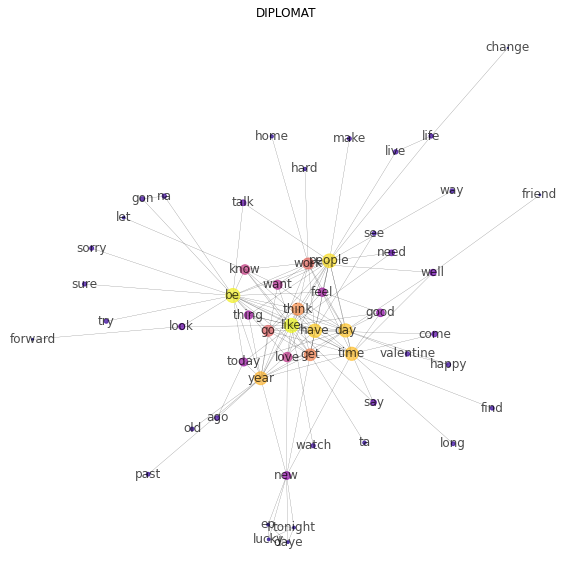

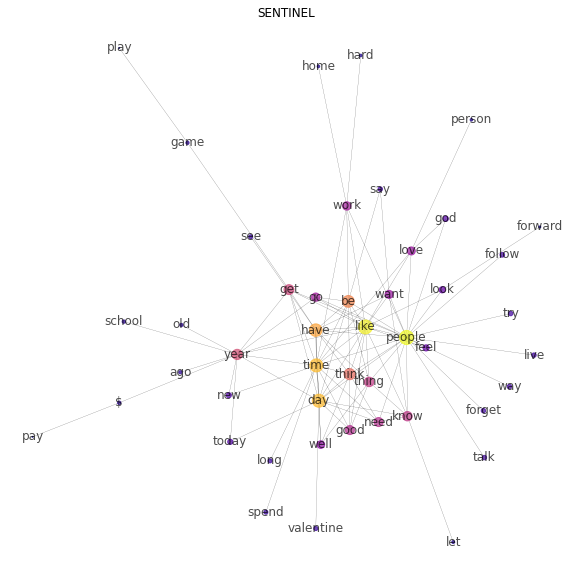

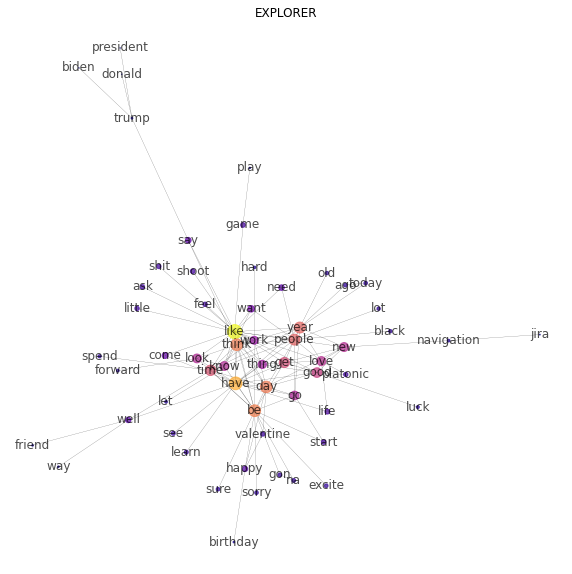

In [93]:
for k, v in dcentralities.items():
    fig, ax = plt.subplots(figsize = (10,10))
    maxC = max(v.items(), key = lambda x : x[1])[1]
    giant = categories[k][2]
    layout = nx.spring_layout(giant, weight='weight', iterations= 100)
    ax.set_title(k.upper())
    nx.draw(giant, ax = ax, pos = layout, labels = {n:n for n in giant.nodes()},
            width=.2,
            alpha = .7,
            node_color = [v[n] / maxC for n in giant.nodes],
            node_size = [v[n] / maxC * 200 for n in giant.nodes],
            cmap = plt.get_cmap('plasma'))

In [94]:
def filterWords(G, minWeight = 3, filter_ = "betweenness", rule = "number", value_of_rule = 200):
    """Function to filter network by degree centrality measures"""
    G = G.copy()
    try:
        G.remove_edges_from([(n1,n2) for n1, n2, d in G.edges(data = True) if d['weight'] < minWeight])
    except:
        print("weight might be missing from one or more edges")
        raise
    if filter_ =="betweenness":
        index = nx.betweenness_centrality(G) #betweeness centrality score
    elif filter_ == "closeness":
        index = nx.closeness_centrality(G) #closeness centrality score
    elif filter_ == "eigenvector":
        index = nx.eigenvector_centrality(G) #eigenvector centrality score
    elif filter_ == "degree":
        index = nx.degree_centrality(G) #degree centrality score
    else:
        raise ValueError("wrong filter paremeter, should be: betweenness/closeness/eigenvector")

    if rule=='number':# if filter by limiting the total number of nodes

        sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
        value_of_rule = np.min([value_of_rule, len(G.nodes)])

        nodes_remain = {}
        for word, centr in sorted_index[:value_of_rule]:
            nodes_remain[word] = centr
        G.remove_nodes_from([n for n in index if n not in nodes_remain])
       # print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

    if rule=='above':# if filter by limiting the min value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] >=value_of_rule])
        #print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

    if rule=='below':# if filter by limiting the max value of centrality
        value_of_rule = np.max([float(value_of_rule),0])
        G.remove_nodes_from([n for n in index if index[n] <=value_of_rule])
     #   print ("Total number of nodes(after filtering) in the graph is %s" % len(G))
        return G

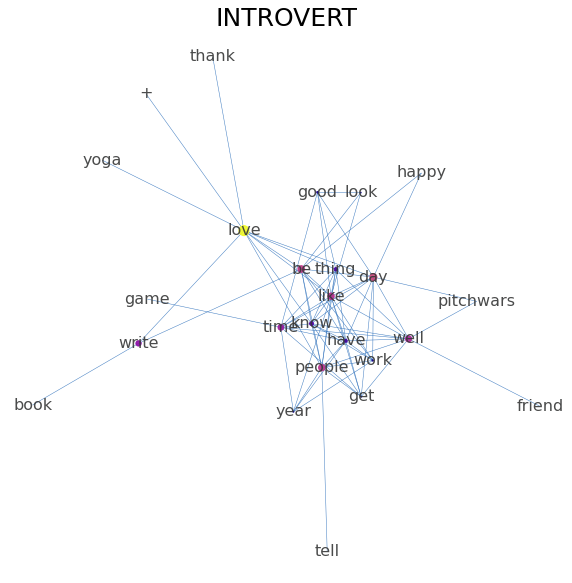

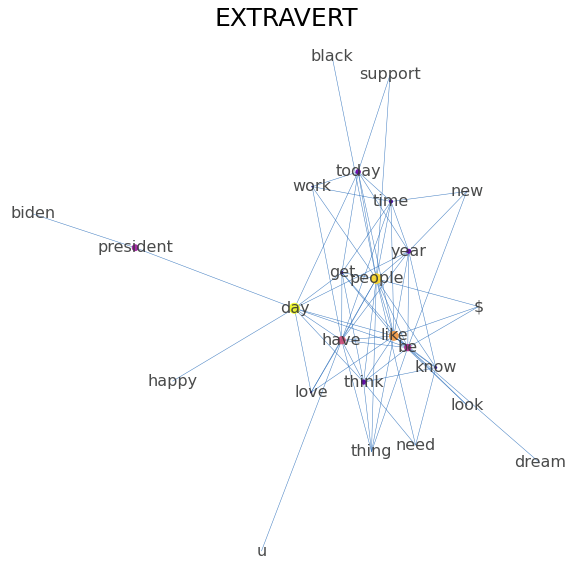

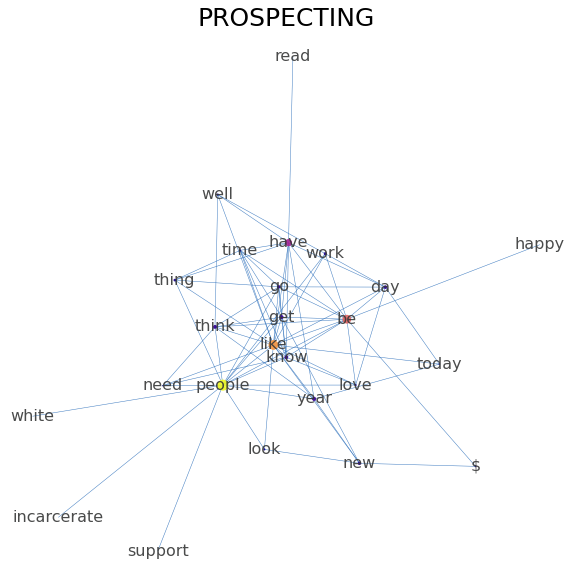

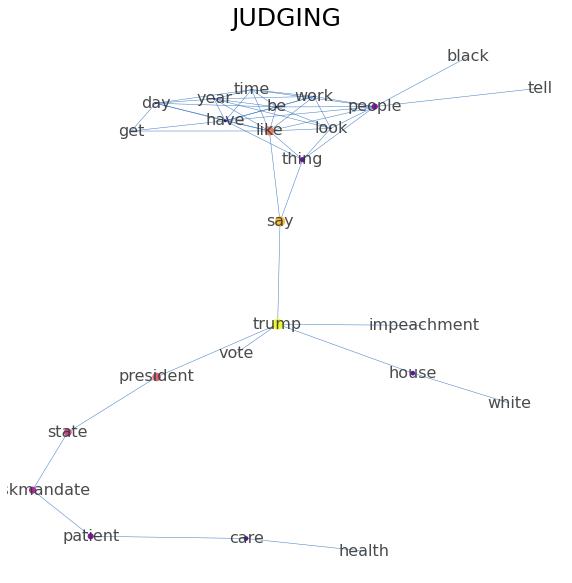

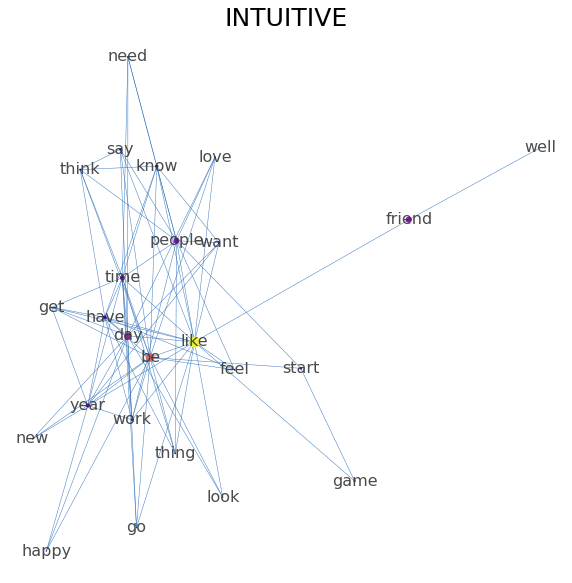

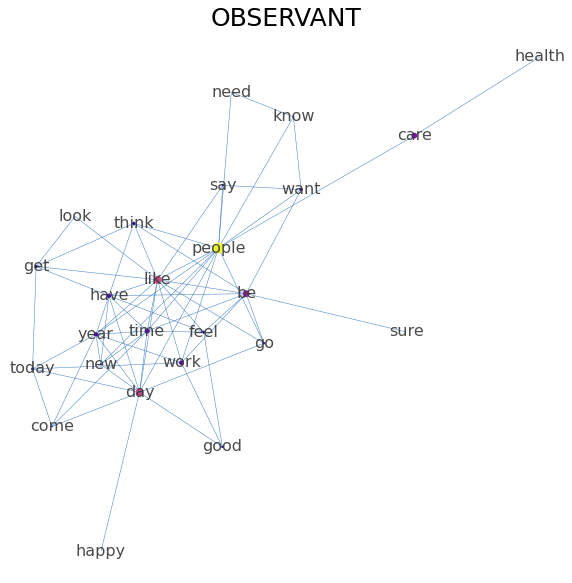

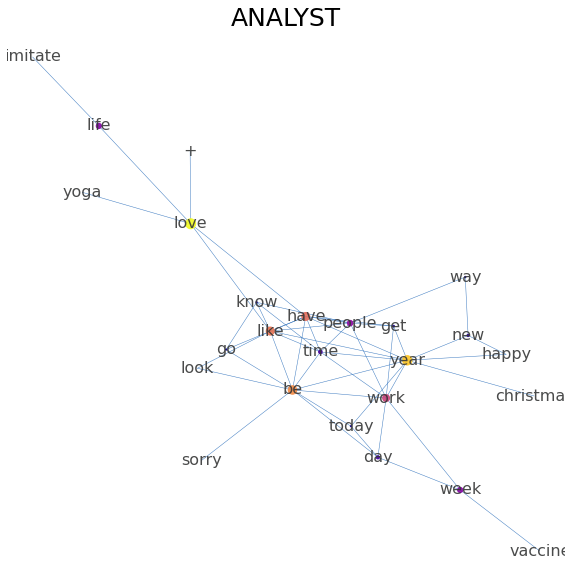

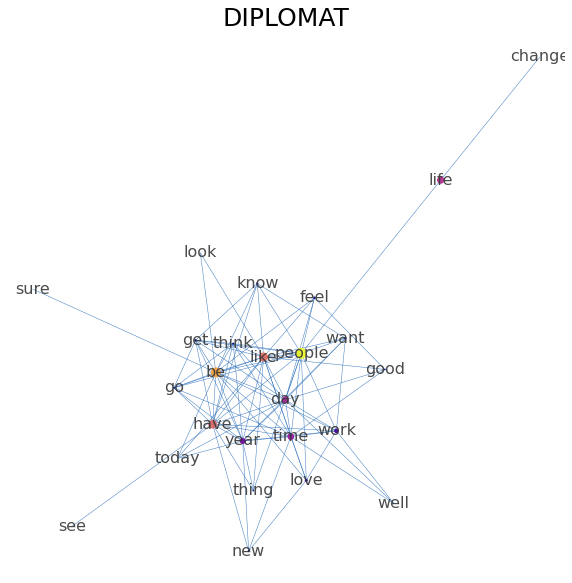

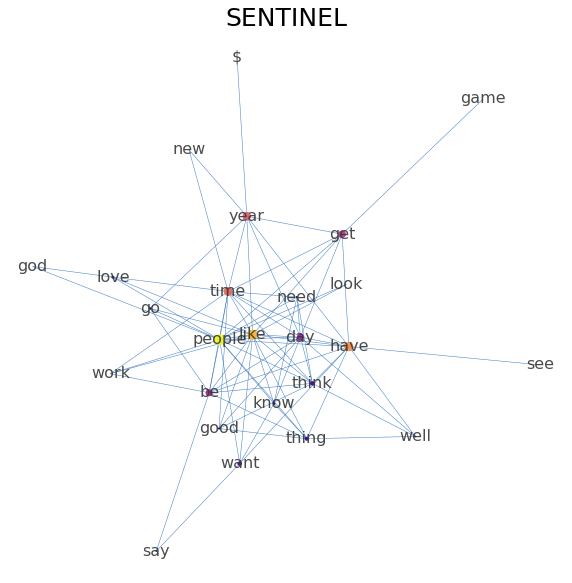

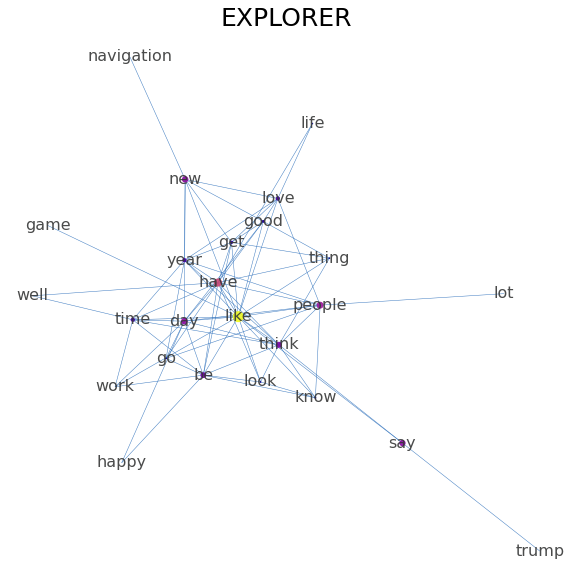

In [95]:
for k, v in dcentralities.items():
    giant = categories[k][2]
    giant_filtered30 = filterWords(giant, minWeight=3, filter_='betweenness', rule='number', value_of_rule=25)
    layout_giant_filtered30 = nx.spring_layout(giant_filtered30, weight='weight', iterations= 100)
    fig, ax = plt.subplots(figsize = (10,10))
    ax.set_title(k.upper(), size = 25)
    centralities_giant30 = nx.betweenness_centrality(giant_filtered30)
    maxC = max(centralities_giant30.items(), key = lambda x : x[1])[1]
    nx.draw(giant_filtered30, ax = ax, pos = layout_giant_filtered30, labels = {n: n for n in giant_filtered30.nodes()},
            alpha = .9,
            width = .5,
            node_color = [centralities_giant30[n] / maxC for n in giant_filtered30.nodes],
            node_size = [centralities_giant30[n] / maxC * 100 for n in giant_filtered30.nodes],
            font_size = 16,
            font_color = 'xkcd:dark grey',
            edge_color = 'xkcd:medium blue',
            cmap = plt.get_cmap('plasma'),
           )

# Divergences

In [96]:
def kl_divergence(X, Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    D_kl = scipy.stats.entropy(p, q)
    return D_kl

def chi2_divergence(X,Y):
    P = X.copy()
    Q = Y.copy()
    P.columns = ['P']
    Q.columns = ['Q']
    df = Q.join(P).fillna(0)
    p = df.iloc[:,1]
    q = df.iloc[:,0]
    return scipy.stats.chisquare(p, q).statistic

def Divergence(corpus1, corpus2, difference="KL"):
    """Difference parameter can equal KL, Chi2, or Wass"""
    freqP = nltk.FreqDist(corpus1)
    P = pd.DataFrame(list(freqP.values()), columns = ['frequency'], index = list(freqP.keys()))
    freqQ = nltk.FreqDist(corpus2)
    Q = pd.DataFrame(list(freqQ.values()), columns = ['frequency'], index = list(freqQ.keys()))
    if difference == "KL":
        return kl_divergence(P, Q)
    elif difference == "Chi2":
        return chi2_divergence(P, Q)
    elif difference == "KS":
        try:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency']).statistic
        except:
            return scipy.stats.ks_2samp(P['frequency'], Q['frequency'])
    elif difference == "Wasserstein":
        try:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None).statistic
        except:
            return scipy.stats.wasserstein_distance(P['frequency'], Q['frequency'], u_weights=None, v_weights=None)

In [97]:
tw_small = pd.concat([tweets[tweets.type == 'ESTP'].sample(n = 6), tw_small])

In [98]:
personalityDF = pd.DataFrame()

for i in set(tw_small['type']):
    personalityDF = personalityDF.append(tw_small[tw_small['type']==i].sample(n = 8, random_state = 754309))

In [99]:
personalityDF = personalityDF[['type', 'clean_text']].groupby('type').sum()

In [101]:
personalityDF['Tokenized Texts'] = personalityDF['clean_text'].apply(lambda x: lucem_illud.word_tokenize(x))
personalityDF['Normalized Tokens'] = personalityDF['clean_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

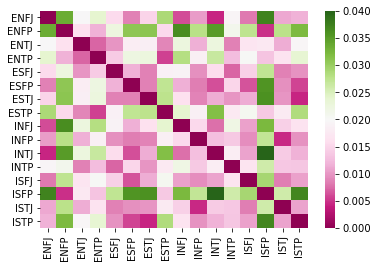

In [102]:
import seaborn as sns

L = []
for p in personalityDF['Normalized Tokens']:
    l = []
    for q in personalityDF['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

fig = plt.figure()
div = pd.DataFrame(M, columns = list(personalityDF.index), index = list(personalityDF.index))
ax = sns.heatmap(div, cmap="PiYG")
plt.show()

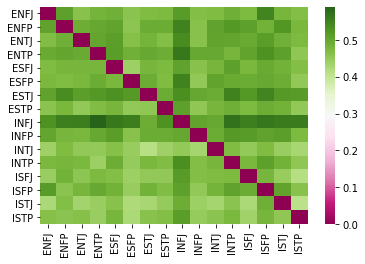

In [103]:
L = []
for p in personalityDF['Normalized Tokens']:
    l = []
    for q in personalityDF['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KL'))
    L.append(l)
M = np.array(L)
fig = plt.figure()
div = pd.DataFrame(M, columns = list(personalityDF.index), index = list(personalityDF.index))
ax = sns.heatmap(div, cmap='PiYG')
plt.show()


In [104]:
i = 0
for df in dfs[-4:]:
    df['role'] = df_labels[-4+i]
    i += 1

In [105]:
roles = dfs[-4:]

In [106]:
sum_roles = []
for df in roles:
    sum_roles.append(df.loc[:, ['role', 'clean_text']].groupby('role').sum())

roles = pd.concat(sum_roles)

In [107]:
roles['Tokenized Texts'] = roles['clean_text'].apply(lambda x: lucem_illud.word_tokenize(x))
roles['Normalized Tokens'] = roles['clean_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

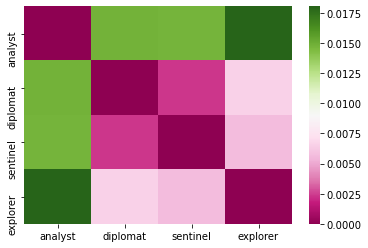

In [108]:
L = []
for p in roles['Normalized Tokens']:
    l = []
    for q in roles['Normalized Tokens']:
        l.append(Divergence(p,q, difference='KS'))
    L.append(l)
M = np.array(L)

fig = plt.figure()
div = pd.DataFrame(M, columns = list(roles.index), index = list(roles.index))
ax = sns.heatmap(div, cmap="PiYG")
plt.show()